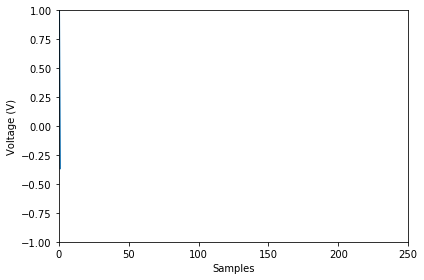

In [21]:
#!/usr/bin/env python3

# based on RPi Pico sample code

# Grabs raw data from virtual UART and plots it as received

# Install dependencies:
# python3 -m pip install pyserial matplotlib

# Usage: python3 plotter <port>
# eg. python3 plotter /dev/ttyACM0

# see matplotlib animation API for more: https://matplotlib.org/stable/api/animation_api.html

import serial
import sys
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.lines import Line2D

# disable toolbar
plt.rcParams['toolbar'] = 'None'

class Plotter:
    def __init__(self, ax):
        self.ax = ax
        self.maxt = 250
        self.tdata = [0]
        self.ydata = [3.3/2]
        self.line = Line2D(self.tdata, self.ydata)

        self.ax.add_line(self.line)
        self.ax.set_ylim(-1, 1)
        self.ax.set_xlim(0, self.maxt)

    def update(self, y):
        lastt = self.tdata[-1]
        if lastt - self.tdata[0] >= self.maxt:  # drop old frames
            self.tdata = self.tdata[1:]
            self.ydata = self.ydata[1:]
            self.ax.set_xlim(self.tdata[0], self.tdata[0] + self.maxt)

        t = lastt + 1
        self.tdata.append(t)
        self.ydata.append(y)
        self.line.set_data(self.tdata, self.ydata)
        return self.line,


def serial_getter():
    # grab fresh ADC values
    # note sometimes UART drops chars so we try a max of 5 times
    # to get proper data
    while True:
        for i in range(5):
            line = ser.readline()
            try:
                line = float(line)
            except ValueError:
                continue
            break
        yield line

#if len(sys.argv) < 2:
#    raise Exception("Ruh roh..no port specified!")

# hard coded serial port name, timeout after 2 minutes
ser = serial.Serial("COM5", 230400, timeout=120)

fig, ax = plt.subplots()
plotter = Plotter(ax)

ani = animation.FuncAnimation(fig, plotter.update, serial_getter, interval=1,
                              blit=True, cache_frame_data=False)

ax.set_xlabel("Samples")
ax.set_ylabel("Voltage (V)")
fig.canvas.manager.set_window_title('Plot Voltage Data [-1-1V]')
fig.tight_layout()
plt.show()